# Linear Regression on House Prices (1D) with Keras

All Rights Reserved © <a href="http://www.louisdorard.com">Louis Dorard</a>

<img src="http://s3.louisdorard.com.s3.amazonaws.com/DL_icon.png">

In this notebook we show how to perform linear regression on house prices data, using Keras.

## Define `X_train` and `y_train`

Run [House Prices 1D](House-Prices-1D.ipynb) notebook to create `data`

In [185]:
#%run House-Prices-1D.ipynb

In [186]:
from pandas import read_csv
data = read_csv('../04-house-prices/origin-trainfull.csv')

In [187]:
y_train = data.SalePrice.values.astype(float)

In [188]:
y_train.shape

(1460,)

In [189]:
from numpy import transpose
y_train = transpose([y_train])

In [190]:
y_train.shape

(1460, 1)

In [191]:
X_train = transpose([data.GrLivArea.values.astype(float)])

In [192]:
X_train.shape

(1460, 1)

## Visualize data in 2D

Initialize plotting lib

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')

The idea here is to find a line that "fits" the data.

## About Keras

* High-level API: describe NN structure in simple and convenient way
* Exists in TensorFlow, and outside (can use other libraries such as MXNet as numerical backend)

## Model relationship between `x` and  `y`

We're looking for `W` and `b` such that <!-- .element: class="fragment" -->

`x * W + b` is a good approximation of `y` <!-- .element: class="fragment" -->

for all `(x, y)` input-output pairs in training. <!-- .element: class="fragment" -->

Main model type in Keras is sequence of "layers", called `Sequential`. In our case:

* 1 input layer (for `x`)
* 1 hidden layer (x length)
* 1 output layer (for `y`)

In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Activation

In [195]:
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Dense(10, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(5, activation = 'relu'),
    Dense(1)
])

## Choose "loss" to minimize

* Error = difference between prediction `x * W + b` and true output `y`
* Compute Mean Squared Error over whole dataset
* MSE is a "loss function"; the smaller, the better
* Loss value depends on `W`, `b`, and dataset
    * => We want values of `W` and `b` that minimize loss on given training set.

In [196]:
loss = 'mse'

## Set up optimizer and "compile" model

Idea: iterative way to find lowest point of mountain, blindfolded?

* “What is the direction of steepest descent under my feet?” => _gradient_
* Follow gradient by a certain step size, called _learning step_ (or _learning rate_ ).
    
This is called _(Stochastic) Gradient Descent_.

![Gradient Descent - Aurélien Géron](figures/GD-Geron.png)

(See Figure 4-3 in _Hands-on ML_ book by Aurélien Géron)

In Keras, optimizer is specified when "compiling" model.

(Last step to fix model training code!)

In [197]:
from tensorflow.keras.optimizers import SGD
LEARNING_RATE = 0.05
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))

Remarks:

* Procedure starts from random value => need to consider random number generator seed!
* Figure is in 1D, but 2 Dimensions when going down a mountain...
* Our linear regression problem is in 2D, because 2 parameters to learn (`W` and `b`)
* Benefits of "compiling" to be discussed in future notebook.

### Scale features

"Normalizing" the data should help prevent values from "exploding":

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [199]:
yscaler = StandardScaler()
y_train_scaled = yscaler.fit_transform(y_train)

## Fit model (i.e. run optimization)

The model still hasn't "seen" any data yet...

* With SGD we can choose the amount of data to be used to compute the loss function (`BATCH_SIZE`). This can be useful when the whole dataset doesn't fit in memory. We'll revisit this later!
* We need to choose for how many iterations to run SGD (`EPOCHS`).
* The `fit` method is a loop over epochs and batches!

In [200]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 200 # how many iterations over the whole dataset
history = model.fit(X_train, y_train_scaled, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1460 samples
Epoch 1/200
1460/1460 [==============================] - 0s 208us/sample - loss: 1.0228
Epoch 2/200
1460/1460 [==============================] - 0s 2us/sample - loss: 0.9110
Epoch 3/200
1460/1460 [==============================] - 0s 1us/sample - loss: 0.8418
Epoch 4/200
1460/1460 [==============================] - 0s 4us/sample - loss: 0.7926
Epoch 5/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.7565
Epoch 6/200
1460/1460 [==============================] - 0s 7us/sample - loss: 0.7286
Epoch 7/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.7065
Epoch 8/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.6876
Epoch 9/200
1460/1460 [==============================] - 0s 6us/sample - loss: 0.6712
Epoch 10/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.6569
Epoch 11/200
1460/1460 [==============================] - 0s 2us/sample - loss: 0.6445
Epoch 12/200
1460/1460 [====

Epoch 95/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5098
Epoch 96/200
1460/1460 [==============================] - 0s 2us/sample - loss: 0.5096
Epoch 97/200
1460/1460 [==============================] - 0s 2us/sample - loss: 0.5094
Epoch 98/200
1460/1460 [==============================] - 0s 5us/sample - loss: 0.5092
Epoch 99/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5090
Epoch 100/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5088
Epoch 101/200
1460/1460 [==============================] - 0s 2us/sample - loss: 0.5086
Epoch 102/200
1460/1460 [==============================] - 0s 2us/sample - loss: 0.5084
Epoch 103/200
1460/1460 [==============================] - 0s 5us/sample - loss: 0.5082
Epoch 104/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5080
Epoch 105/200
1460/1460 [==============================] - 0s 5us/sample - loss: 0.5078
Epoch 106/200
1460/1460 [============

1460/1460 [==============================] - 0s 2us/sample - loss: 0.5006
Epoch 189/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5006
Epoch 190/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5006
Epoch 191/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5005
Epoch 192/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5005
Epoch 193/200
1460/1460 [==============================] - 0s 2us/sample - loss: 0.5005
Epoch 194/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5004
Epoch 195/200
1460/1460 [==============================] - 0s 2us/sample - loss: 0.5004
Epoch 196/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5004
Epoch 197/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5003
Epoch 198/200
1460/1460 [==============================] - 0s 3us/sample - loss: 0.5003
Epoch 199/200
1460/1460 [=====================

[Plot data again](#Visualize-data).

### Reset model

Simplest way to reset all weights & biases is to re-execute the definition of `model`.

We can then fit again.

Remarks:

* Procedure starts from random value => need to consider random number generator seed!
* Figure is in 1D, but 2 Dimensions when going down a mountain...
* Our linear regression problem is in 2D, because 2 parameters to learn (`W` and `b`)
* Benefits of "compiling" to be discussed in future notebook.

## Review learning curve

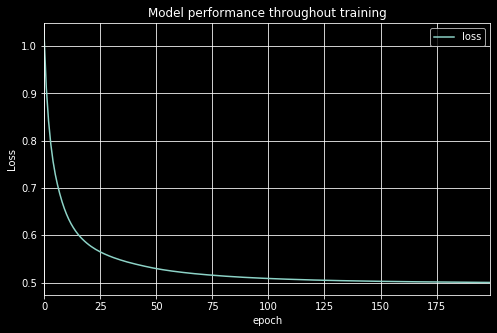

In [201]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Visualize model

* Model is line defined by coefficient `W` and bias (a.k.a. intercept) `b`
* Just need to plot 2 points and link them... 
    * x-axis: let's choose minimum and maximum of `X_train`
    * y-axis: given by model's predictions

In [202]:
import numpy as np
x_line = np.transpose([[X_train.min(), X_train.max()]])
y_line = model.predict(x_line)
y_line = yscaler.inverse_transform(y_line)

In [203]:
print("Point 1: [" + str(x_line[0][0]) + ", " + str(y_line[0]) + " ]")
print("Point 2: [" + str(x_line[1][0]) + ", " + str(y_line[1]) + " ]")

Point 1: [-2.2491201474608564, [119402.56] ]
Point 2: [7.855574356961303, [576254.25] ]


In [204]:
y_predict = model.predict(X_train)
y_predict = yscaler.inverse_transform(y_predict)

In [205]:
y_predict

array([[205669.14],
       [142473.6 ],
       [214651.56],
       ...,
       [270627.12],
       [131668.61],
       [141743.98]], dtype=float32)

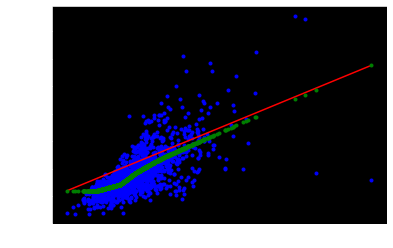

In [206]:
%matplotlib inline
plt.plot(X_train, y_train, "b.")
plt.plot(x_line, y_line, "r-") # "r-" means we plot data points in red and link them with a line
plt.plot(X_train, y_predict, "g.");
plt.show()

In [207]:
from sklearn import metrics
#print('MSLE : ', metrics.mean_squared_log_error(y_train, y_predict))
print('MAE : ', metrics.mean_absolute_error(y_train, y_predict)) 

MAE :  38302.260541523974


Might want to increase learning rate?

## Change learning rate

### Learning rate too small

The loss decrease is too slow

![Gradient Descent with a small learning step - Aurélien Géron](figures/GD-small-learning-rate-Geron.png)

(See Figure 4-4 in _Hands-on ML_ book by Aurélien Géron)

### Learning rate too big

Depending on the initialization, it could converge slowly, or it could diverge 

![Gradient Descent with a big learning step - Aurélien Géron](figures/GD-big-learning-rate-Geron.png)

(See Figure 4-5 in _Hands-on ML_ book by Aurélien Géron)